데이터 로딩(Data Loading)

In [155]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 브라우저에서 바로 그림을 볼 수 있게 해줍니다.
%matplotlib inline

In [156]:
train_df = pd.read_csv('/aiffel/data/train.csv')
test_df = pd.read_csv('/aiffel/data/test_truelabels.csv')

데이터 확인

In [157]:
print('+++++++++++++++++++++++++++++++') 
print('Train size:', train_df.shape)   # 학습 데이터의 배열(크기) 확인 
print('Test size:', test_df.shape)  # 테스트 데이터의 배열(크기) 확인
print('-------------------------------')
print('Train columns :', train_df.columns.values)  # 학습 데이터의 변수 확인 
print('Test columns :', test_df.columns.values )   # 테스트 데이터의 변수 확인 
print('+++++++++++++++++++++++++++++++')

+++++++++++++++++++++++++++++++
Train size: (891, 12)
Test size: (418, 12)
-------------------------------
Train columns : ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
Test columns : ['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked' 'Survived']
+++++++++++++++++++++++++++++++


In [158]:
# 학습 데이터 중 상위 5개의 데이터 확인 
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [159]:
# 학습 데이터의 전반적인 정보 확인
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [160]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


데이터 전처리

변수 제거
 - drop()을 통해 각각의 변수 중 중복되거나 밀접한 상관 관계가 있는 것을 제거합니다. 이는 모형에 데이터를 입력할 때 과적합(overfitting)을 방지할 수 있습니다. 제거할 변수는 아래와 같습니다.

 - PassengerId, Name : 각 고유한 승객 ID와 이름은 데이터를 설명하는 특정 정보를 포함하고 있지 않습니다.
 - Ticket, Fare : Pclass와 동일한 정보를 가지고 있습니다.
 - Cabin : Ticket, Fare와 동일한 정보가 포함되어 있습니다.

In [161]:
train_df = train_df.drop(['PassengerId','Name','Ticket', 'Fare', 'Cabin'], axis=1)
print(train_df.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')


In [162]:
# 문제 1-1. 변수를 제거한 학습 데이터를 확인해 봅시다.   

# 변수가 제거된 데이터의 전반적인 내용을 확인하는 코드를 적어주세요.  
train_df.info()

# 데이터를 복사하는 코드를 적어 보세요. 
train_df = train_df.copy()

# 복사된 데이터의 전반적인 내용을 확인하는 코드를 적어주세요.  
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4

결측치 채우기

In [163]:
train_df['Age'] = train_df['Age'].fillna(0)
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
print('The most frequent value:',train_df['Embarked'].mode()[0])
train_df.info()

The most frequent value: S
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [164]:
# 학습 데이터 중 하위 5개의 데이터 확인
train_df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,0.0,1,2,S
889,1,1,male,26.0,0,0,C
890,0,3,male,32.0,0,0,Q


변수 변환
 - 모형에 입력값을 넣기 위해서 문자형을 숫자형으로 변환을 해야 합니다. 문자형에서 숫자형으로 변환할 때는 모형이 패턴을 인식할 수 있도록 의미 있는 형태로 규칙을 만들 수 있습니다. 규칙은 정해진 것이 아니므로 여러분이 원하는 규칙을 사용할 수도 있습니다.

 - Sex는 1과 0으로 성별을 나누어 의미를 가지도록 하였습니다.
 - Embarked는 각 항구를 의미하는 C, Q, S를 각각 0, 1, 2로 표현하여 의미를 부여했습니다.
 
 - 숫자형으로 인코딩하는 방법으로는 우선 astype()을 사용하여 형 변환을 하고, cat.codes를 사용하여 숫자형을 데이터프레임 전체에 적용할 수 있습니다.



In [165]:
train_df["Sex"] = train_df["Sex"].astype('category')
train_df["Sex"] = train_df["Sex"].cat.codes  

# 문제 1-2. 변수 Embarked를 숫자형으로 변환하고, 데이터프레임 전체에 적용해 보세요. 
train_df["Embarked"] = train_df["Embarked"].astype('category')
train_df["Embarked"] = train_df["Embarked"].cat.codes 
# 문제 1-3. 학습 데이터 중 하위 5개의 데이터를 확인해 보세요. 
# train_df.tail()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int8   
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    int8   
dtypes: float64(1), int64(4), int8(2)
memory usage: 36.7 KB


데이터 탐색 및 시각화

먼저 데이터 통계량 탐색을 해보겠습니다. 데이터 통계량을 탐색하는 것은 describe()를 통해서 할 수 있습니다. describe()는 일반적인 통계치, 즉 평균, 표준편차, 최솟값, 사분위수(25%, 50%, 75%), 최댓값 등을 확인할 수 있습니다. 참고로 사분위수(25%, 50%, 75%)를 통해 IQR을 계산할 수 있습니다.

In [166]:
# 데이터 통계량 탐색
train_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,23.799293,0.523008,0.381594,1.536476
std,0.486592,0.836071,0.477990,17.596074,1.102743,0.806057,0.791503
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,6.000000,0.000000,0.000000,1.000000
50%,0.000000,3.000000,1.000000,24.000000,0.000000,0.000000,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,2.000000


In [167]:
for i in range(1,train_df.shape[1]): 
    print(train_df[[train_df.columns[i], "Survived"]].groupby([train_df.columns[i]], as_index=False).
          mean().sort_values(by='Survived', ascending=False))
    print('===================================')

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
   Sex  Survived
0    0  0.742038
1    1  0.188908
      Age  Survived
88  80.00       1.0
80  63.00       1.0
17  12.00       1.0
1    0.42       1.0
10   5.00       1.0
..    ...       ...
47  34.50       0.0
62  46.00       0.0
61  45.50       0.0
50  36.50       0.0
31  23.50       0.0

[89 rows x 2 columns]
   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000
   Embarked  Survived
0         0  0.553571
1         1  0.389610
2         2  0.339009



 - Pclass : 1등급 객실에 승선하고 있는 인원의 생존율이 높음을 알 수 있습니다.
 - Sex : 여성(0)의 생존율이 높음을 알 수 있습니다.
 - SibSp : 형제자매 및 배우자의 수를 뜻합니다.
 - Parch : 부모 및 자녀의 수를 의미합니다.
 - Embarked : C 항구에서 탑승한 탑승객의 생존율이 높음을 알 수 있습니다.
 그러나 실제 C 항구에서 탑승한 탑승객이 더 많은지 등을 파악해야 합니다.
 
 선장이 아이-여자-남자순으로 구출을 했기 때문에 여자 비율이 높다.

각 변수들의 분포도
 - 수치로만 확인할 때보다 시각화를 통해 데이터를 더 직관적으로 파악할 수 있을 때가 있습니다. 따라서 각 변수별 생존율을 분포도로 살펴보았습니다.

 - 코드를 설명해 보겠습니다. 우선 6개의 변수를 시각화하기 위해 subplot을 2 x 3 = 6으로 그리고 adjust를 통해 플롯(plot)간의 간격을 조정하였습니다. 플롯은 히스토그램을 사용하였습니다. 히스토그램은 막대그래프와 비슷하지만 데이터의 분포 정도를 직관적으로 알아보기 쉽기 때문입니다.

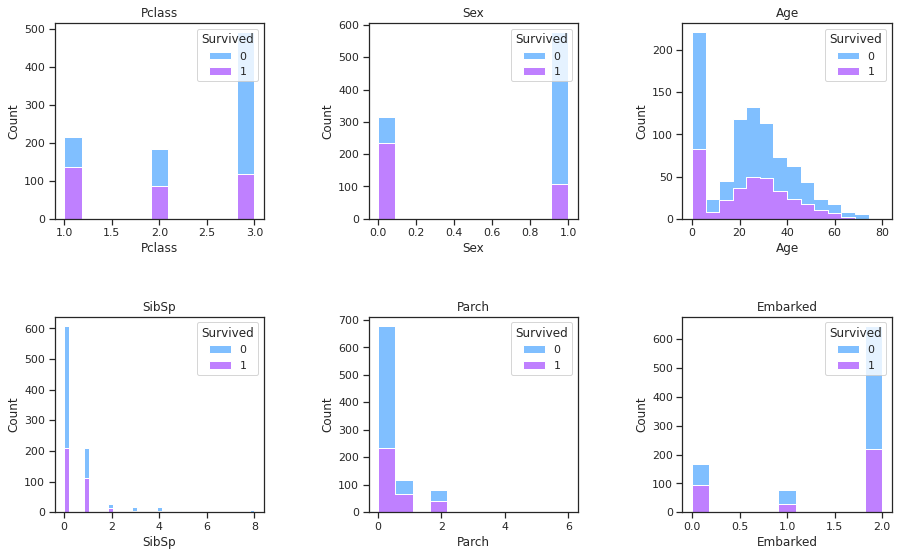

In [168]:
col_name = train_df.columns[1:] 

fig, axs = plt.subplots(2,3, figsize=(15, 9), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)
axs = axs.ravel()  # 다차원 배열을 1차원으로 변경

for i in range(col_name.shape[0]):
    sns.histplot(data=train_df,x=train_df[col_name[i]],hue='Survived',palette='cool',
                 multiple="stack",ax=axs[i], element="step")
    axs[i].set_title(col_name[i])

<Figure size 648x648 with 0 Axes>

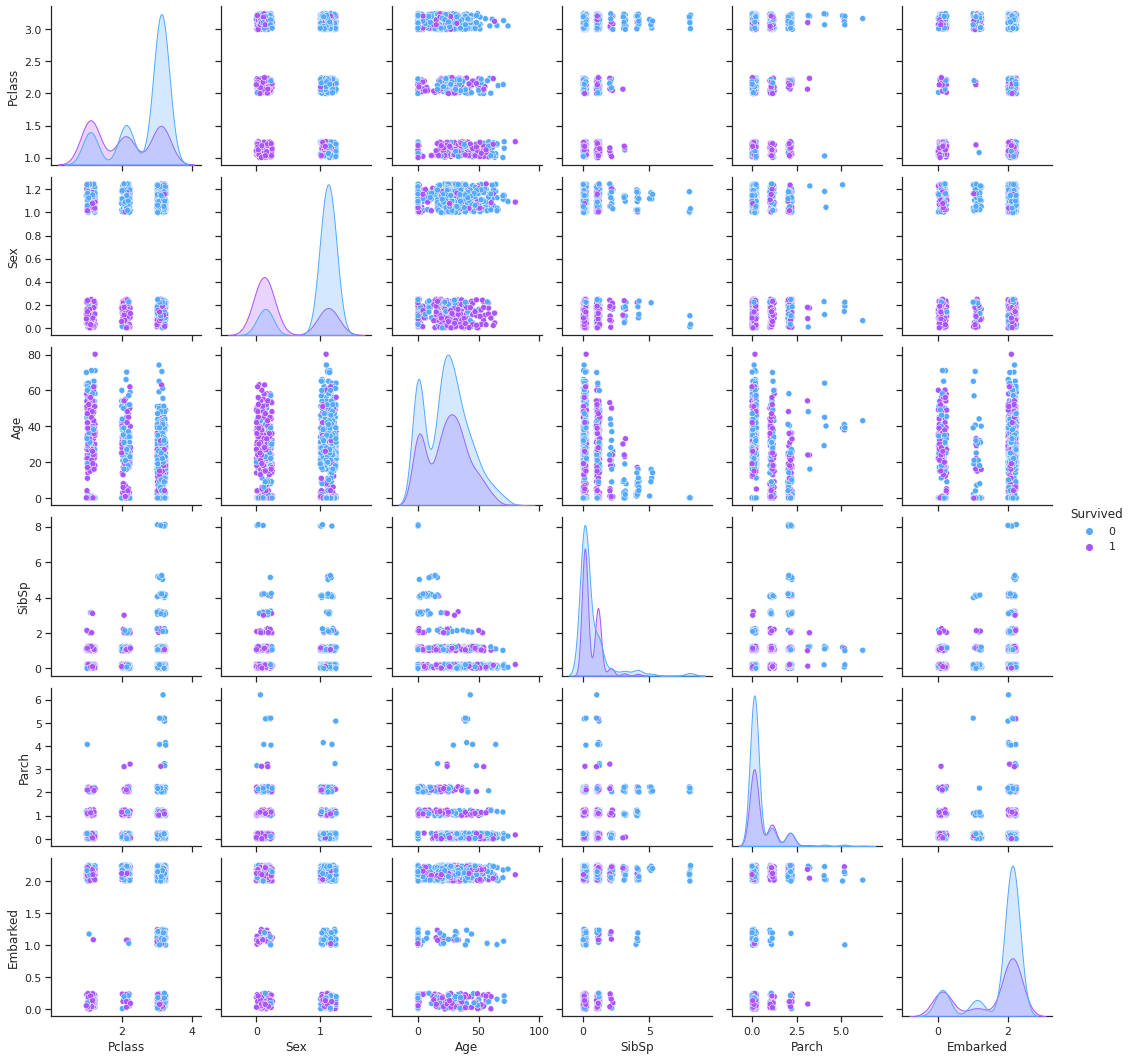

In [169]:
train_df_rand = train_df.copy()

plt.figure(figsize=(9,9))
rand = pd.DataFrame(np.random.randint(0,100,size=train_df.iloc[:,1:].shape), 
                  columns=train_df.iloc[:,1:].columns)/400
train_df_rand.iloc[:,1:]=train_df.iloc[:,1:]+rand
sns.set(style="ticks")
sns.pairplot(train_df_rand,hue='Survived',palette='cool')

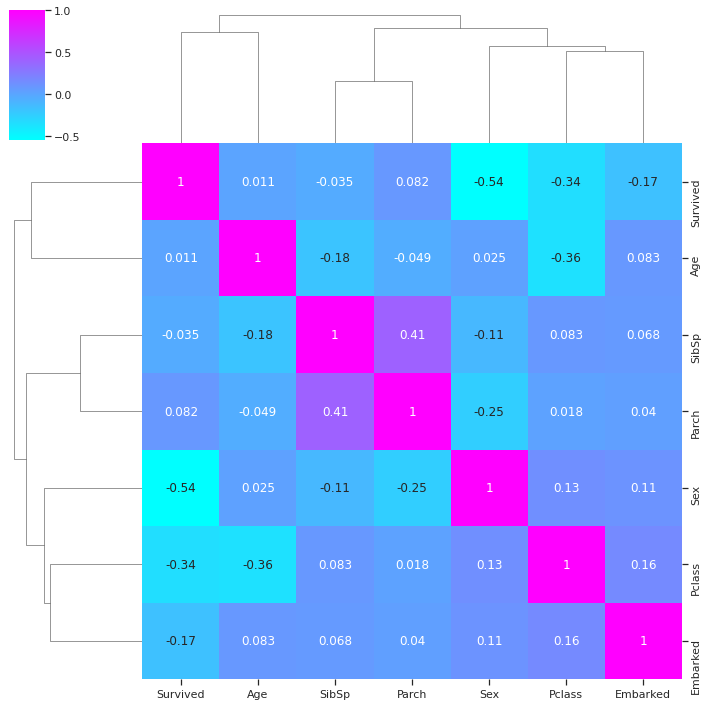

In [170]:
corr = train_df.corr()
sns.clustermap(corr,annot = True,cmap = 'cool')

모델링

In [171]:
X_train = train_df.drop(['Survived'], axis=1)
y_train = train_df['Survived']
# X_train
print(X_train.shape, y_train.shape)

(891, 6) (891,)


테스트 데이터 전처리

In [172]:
# 문제 2. 테스트 데이터를 전처리해 보세요. 
# test_df에서 필요 없는 변수를 제거해 주세요.
test_df = test_df.drop(['PassengerId','Name','Ticket','Fare','Cabin'], axis=1)
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,34.5,0,0,Q,0
1,3,female,47.0,1,0,S,1
2,2,male,62.0,0,0,Q,0
3,3,male,27.0,0,0,S,0
4,3,female,22.0,1,1,S,1


In [173]:
# 변수 Age의 결측치를 0으로 변환해 주세요. 
test_df['Age'] = test_df['Age'].fillna(0)
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,34.5,0,0,Q,0
1,3,female,47.0,1,0,S,1
2,2,male,62.0,0,0,Q,0
3,3,male,27.0,0,0,S,0
4,3,female,22.0,1,1,S,1


In [174]:
# 변수 Embarked의 결측치를 가장 빈도수가 높은 항구로 채워주세요. 
test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])
                                                 
print('The most frequent value:', test_df['Embarked'].mode()[0])


The most frequent value: S


In [175]:
   
# 변수 Sex와 Embarked의 데이터를 숫자형으로 변환하고, 데이터프레임 전체에 적용해 주세요. 
test_df["Sex"] = test_df["Sex"].astype('category')
test_df["Sex"] = test_df["Sex"].cat.codes  

test_df["Embarked"] = test_df["Embarked"].astype('category')
test_df["Embarked"] = test_df["Embarked"].cat.codes 

test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,1,34.5,0,0,1,0
1,3,0,47.0,1,0,2,1
2,2,1,62.0,0,0,1,0
3,3,1,27.0,0,0,2,0
4,3,0,22.0,1,1,2,1


In [176]:
# test_df를 X_test와 y_test로 분리해주세요. (종속 변수: Survived)
X_test = test_df.drop(['Survived'], axis=1)
# X_train
y_test = test_df['Survived']
# y_train
print(X_test.shape, y_test.shape)

(418, 6) (418,)


교차검증

모형 평가(Model evaluation)
 - 데이터 분석을 위해 사용할 모형은 총 7가지로, 여러 가지 모형을 활용하여 각 모형의 예측 성능을 비교 분석할 수 있습니다. 여기서는 각 모형의 설명은 넘어가겠습니다. 각 모형을 더 자세히 알고 싶다면 검색을 해보거나 머신러닝 기초 강의를 수강해 주세요.

 - Support Vector Machine(SVM): 서포트 벡터 머신
 - K-Nearest Neighbor(KNN): K-최근접 이웃
 - Stochastic Gradient Descent(SGD): 확률적 경사 하강법
 - Logistic Regression: 로지스틱 회귀
 - Decision Tree: 결정 나무
 - Random Forest: 랜덤 포레스트

In [177]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import  LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score

import matplotlib.ticker as ticker  # x축 스케일 조절

In [178]:
import warnings
warnings.filterwarnings('ignore')  # 워닝 무시하기

models = [
    SVC(gamma='auto'), 
    KNeighborsClassifier(n_neighbors=3),
    SGDClassifier(max_iter=100, tol=1e-3),
    SGDClassifier(),
    LogisticRegression(solver='lbfgs'), 
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(n_estimators=100)
]


for clf in models:
    print('===================================')
    print("model:",clf)
    kfold(X_train, y_train, clf)

model: SVC(gamma='auto')
Score: 0.7923294206264516
model: KNeighborsClassifier(n_neighbors=3)
Score: 0.7575481765112045
model: SGDClassifier(max_iter=100)
Score: 0.7149959199045886
model: SGDClassifier()
Score: 0.667823739878225
model: LogisticRegression()
Score: 0.7856317870817902
model: DecisionTreeClassifier(max_depth=10)
Score: 0.7822986629841191
model: RandomForestClassifier()
Score: 0.77890276818781


In [179]:
import warnings
warnings.filterwarnings('ignore')  # 워닝 무시하기

models = [
    SVC(gamma='auto'), 
    KNeighborsClassifier(n_neighbors=3),
    SGDClassifier(max_iter=100, tol=1e-3),
    SGDClassifier(),
    LogisticRegression(solver='lbfgs'), 
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(n_estimators=100)
]


for clf in models:
    print('===================================')
    print("model:",clf)
    kfold(X_train, y_train, clf)
    

model: SVC(gamma='auto')
Score: 0.7923294206264516
model: KNeighborsClassifier(n_neighbors=3)
Score: 0.7575481765112045
model: SGDClassifier(max_iter=100)
Score: 0.7260686711443098
model: SGDClassifier()
Score: 0.7306634862846023
model: LogisticRegression()
Score: 0.7856317870817902
model: DecisionTreeClassifier(max_depth=10)
Score: 0.781175067478501
model: RandomForestClassifier()
Score: 0.786761659657272


가장 높은 숫자가 있는 모형이 성능이 높은 모형이다~
 - model: RandomForestClassifier()

In [180]:
test_df.describe()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.636364,24.044258,0.447368,0.392344,1.401914,0.377990
std,0.841838,0.481622,17.599608,0.896760,0.981429,0.854496,0.485466
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,9.000000,0.000000,0.000000,1.000000,0.000000
50%,3.000000,1.000000,24.000000,0.000000,0.000000,2.000000,0.000000
75%,3.000000,1.000000,35.750000,1.000000,0.000000,2.000000,1.000000
max,3.000000,1.000000,76.000000,8.000000,9.000000,2.000000,1.000000


성능 평가
ROC-AUC 확인하기

우리는 지금까지 타이타닉 데이터를 활용해 데이터 분석을 하였습니다. 데이터 분석을 통해 알고자 하는 바는 탑승객의 생존 여부입니다. 그래서 우리는 종속 변수 Survived(생존 여부)을 0과 1로 변경하고 이를 이진 분류(binary classification)하였습니다. 이제 우리가 선택한 모형이 새로운 데이터에서 예측을 잘 하였는지 평가하는 시간입니다. ROC와 AUC를 통해 모형의 분류 성능을 확인할 수 있습니다.

우선 로지스틱 회귀 모형의 성능을 평가해 봅시다.

In [181]:
clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)[:,1]

plt.figure(figsize=(8,6))

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

In [182]:
def roc_curve_plot(y_test, y_pred):
    fprs, tprs, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fprs, tprs, 'ro-',label='ROC')
    plt.plot([0,1],[0,1], 'k--', label='Random classifier')
    
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(-0.01, 1); plt.ylim(0, 1.01)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()

AUC: 0.8022517039922104


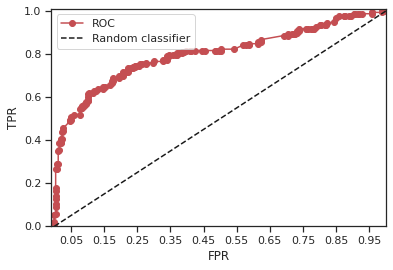

In [183]:
roc_curve_plot(y_test, y_pred)

print("AUC:",roc_auc_score(y_test, y_pred))

In [186]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int8   
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    int8   
dtypes: float64(1), int64(4), int8(2)
memory usage: 36.7 KB


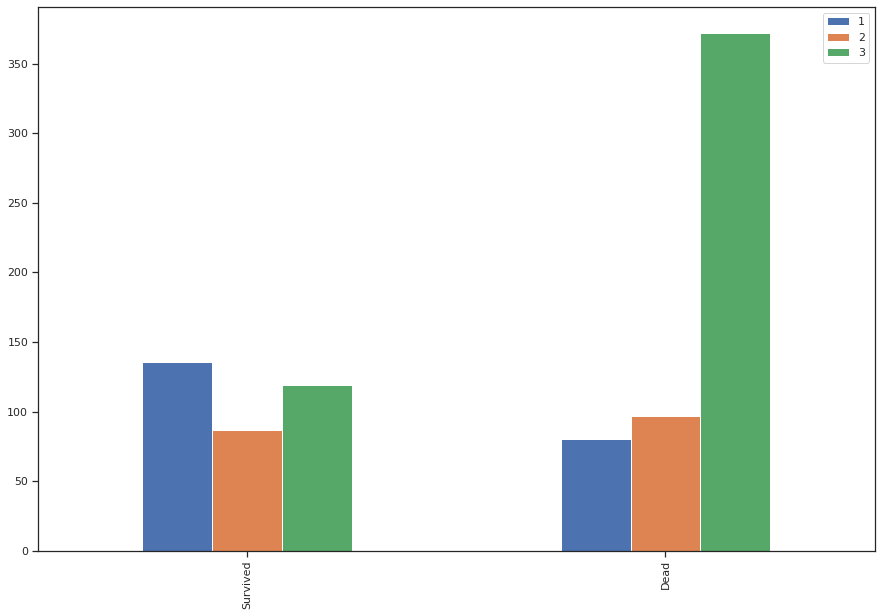

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

train = train_df

def bar_chart(feature):
  survived = train.loc[train["Survived"]==1,feature].value_counts()  #해당 특징의 Survived 가 1인 갯수를 세어준다.
  dead = train.loc[train["Survived"]==0,feature].value_counts()
  data = pd.DataFrame([survived,dead],index = ["Survived","Dead"])
  data.plot(kind="bar",figsize=(15,10))
  plt.show()

#pclass에 따른 생존/사망자 확인
bar_chart("Pclass")

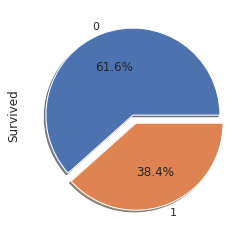

In [113]:
train_df["Survived"].value_counts().plot.pie( explode=[0,0.1], autopct='%1.1f%%', shadow=True)
plt.show()